In [209]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.stats import zscore
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [210]:
df = pd.read_csv("customer_conversion_traing_dataset.csv")
df_test = pd.read_csv("customer_conversion_testing_dataset.csv")

### EDA

In [211]:
df.head()

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0


In [212]:
df.shape

(100000, 19)

In [213]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].value_counts())
    print(df[col].unique().sum())


Unique values in column 'LeadID':
LeadID
99984    1
99983    1
99982    1
99981    1
99980    1
        ..
5        1
4        1
3        1
2        1
1        1
Name: count, Length: 100000, dtype: int64
5000050000
Unique values in column 'Age':
Age
26    2516
56    2509
51    2496
25    2495
28    2493
60    2492
44    2490
21    2489
20    2480
47    2477
29    2473
48    2471
46    2467
58    2461
39    2456
23    2456
50    2452
45    2451
31    2448
40    2447
52    2442
43    2439
57    2436
49    2431
41    2427
24    2418
27    2416
59    2413
37    2410
33    2410
32    2408
36    2405
30    2403
35    2399
38    2398
34    2397
54    2396
55    2390
22    2365
53    2365
42    2313
Name: count, dtype: int64
1640
Unique values in column 'Gender':
Gender
Male      50123
Female    49877
Name: count, dtype: int64
FemaleMale
Unique values in column 'Location':
Location
Faisalabad    10196
Peshawar      10096
Gujranwala    10064
Lahore        10057
Islamabad     10039
Karachi      

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LeadID                 100000 non-null  int64  
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Location               100000 non-null  object 
 4   LeadSource             100000 non-null  object 
 5   TimeSpent (minutes)    100000 non-null  int64  
 6   PagesViewed            100000 non-null  int64  
 7   LeadStatus             100000 non-null  object 
 8   EmailSent              100000 non-null  int64  
 9   DeviceType             100000 non-null  object 
 10  ReferralSource         100000 non-null  object 
 11  FormSubmissions        100000 non-null  int64  
 12  Downloads              100000 non-null  int64  
 13  CTR_ProductPage        100000 non-null  float64
 14  ResponseTime (hours)   100000 non-nul

In [215]:
df.describe()

,LeadID,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,Conversion (Target)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,39.995810,32.529550,8.502020,5.001580,2.49979,1.498820,0.449336,12.514950,4.984590,110.106390,0.016470
std,28867.657797,11.854746,16.150348,4.029558,3.169473,1.70861,1.117484,0.206320,6.929558,3.166025,52.204422,0.127275
min,1.000000,20.000000,5.000000,2.000000,0.000000,0.00000,0.000000,0.100000,1.000000,0.000000,20.000000,0.000000
25%,25000.750000,30.000000,19.000000,5.000000,2.000000,1.00000,0.000000,0.300000,7.000000,2.000000,65.000000,0.000000
50%,50000.500000,40.000000,33.000000,8.000000,5.000000,3.00000,2.000000,0.400000,13.000000,5.000000,110.000000,0.000000
75%,75000.250000,50.000000,47.000000,12.000000,8.000000,4.00000,2.000000,0.600000,19.000000,8.000000,155.000000,0.000000
max,100000.000000,60.000000,60.000000,15.000000,10.000000,5.00000,3.000000,0.800000,24.000000,10.000000,200.000000,1.000000


In [216]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows : {duplicates}  ")

Number of duplicate rows : 0  


In [217]:
# Display class distribution
print("\nClass distribution:")
Target_counts = df['Conversion (Target)'].value_counts()
print(Target_counts)


Class distribution:
Conversion (Target)
0    98353
1     1647
Name: count, dtype: int64


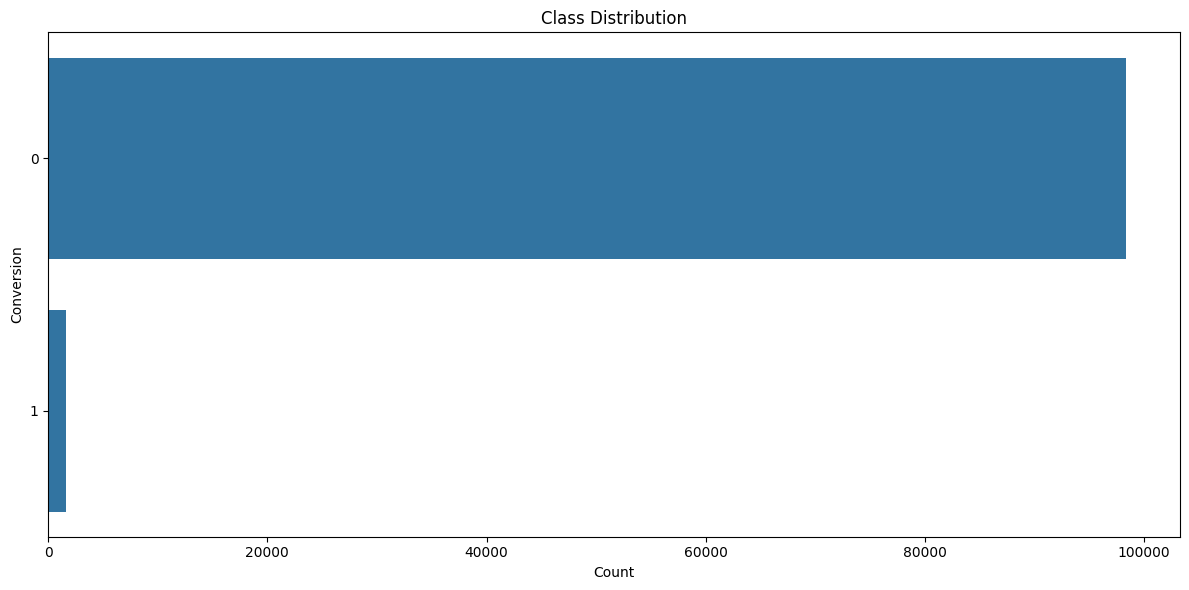

In [218]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sn.countplot(y='Conversion (Target)', data=df, order=Target_counts.index)
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Conversion')
plt.tight_layout()
plt.show()

In [219]:
numeric_cols = df.select_dtypes(include=['number']).columns
# Calculate z-scores for each numeric column
z_scores = df[numeric_cols].apply(zscore)
threshold = 3
# Find outliers: True where absolute Z-score > threshold
outliers = (z_scores.abs() > threshold)
for col in numeric_cols:
    outlier_indices = outliers[col][outliers[col]].index
    print(f"Outliers in column '{col}':")
    print(df.loc[outlier_indices, col])
    print()

Outliers in column 'LeadID':
Series([], Name: LeadID, dtype: int64)

Outliers in column 'Age':
Series([], Name: Age, dtype: int64)

Outliers in column 'TimeSpent (minutes)':
Series([], Name: TimeSpent (minutes), dtype: int64)

Outliers in column 'PagesViewed':
Series([], Name: PagesViewed, dtype: int64)

Outliers in column 'EmailSent':
Series([], Name: EmailSent, dtype: int64)

Outliers in column 'FormSubmissions':
Series([], Name: FormSubmissions, dtype: int64)

Outliers in column 'Downloads':
Series([], Name: Downloads, dtype: int64)

Outliers in column 'CTR_ProductPage':
Series([], Name: CTR_ProductPage, dtype: float64)

Outliers in column 'ResponseTime (hours)':
Series([], Name: ResponseTime (hours), dtype: int64)

Outliers in column 'FollowUpEmails':
Series([], Name: FollowUpEmails, dtype: int64)

Outliers in column 'SocialMediaEngagement':
Series([], Name: SocialMediaEngagement, dtype: int64)

Outliers in column 'Conversion (Target)':
91       1
93       1
103      1
137      1
1

In [220]:
X = df.select_dtypes(include=['number']).drop(columns=['Conversion (Target)'])
y = df['Conversion (Target)']
# Run ANOVA F-test
F_values, p_values = f_classif(X, y)

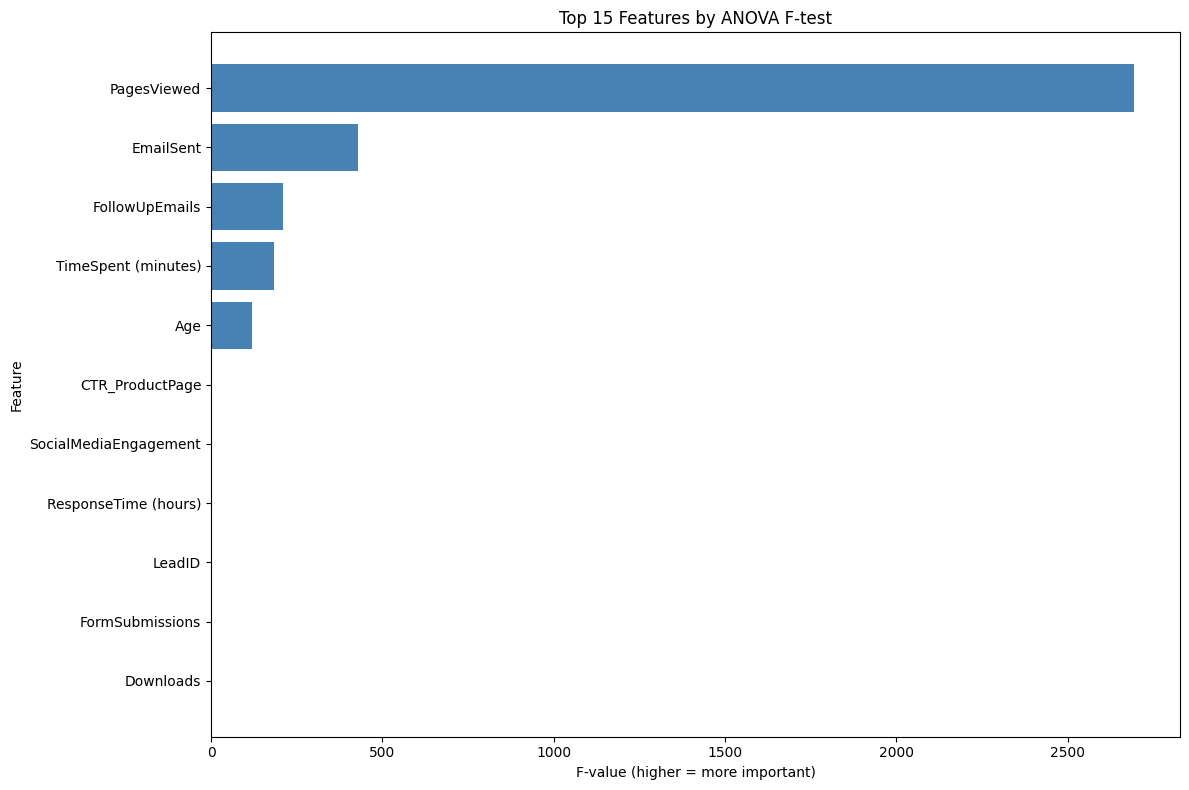

In [221]:
results_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Value': F_values
})
top_features = results_df.sort_values('F_Value', ascending=True).tail(15)
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['F_Value'], color='steelblue')
plt.title('Top 15 Features by ANOVA F-test')
plt.xlabel('F-value (higher = more important)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Preprocessing

In [222]:
# Binary Encoding
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['PaymentHistory'] = df['PaymentHistory'].map({'No Payment': 0, 'Good': 1})
# Ordinal Encoding
lead_status_map = {'Cold': 0, 'Warm': 1, 'Hot': 2}
df['LeadStatus'] = df['LeadStatus'].map(lead_status_map)
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Location', 'LeadSource', 'DeviceType', 'ReferralSource'], drop_first=True)
df = df.astype({col: 'int' for col in df.columns if df[col].dtype == 'bool'})


In [223]:
df.head()

,LeadID,Age,Gender,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,...,Location_Sialkot,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter
0,1,60,0,30,13,1,1,4,0,0.3,...,0,0,1,0,0,0,0,1,0,0
1,2,27,0,28,4,2,7,2,2,0.3,...,0,0,1,0,0,0,0,0,0,0
2,3,21,0,45,10,1,9,4,2,0.6,...,0,0,1,0,0,1,0,0,0,0
3,4,37,0,45,15,1,5,1,3,0.3,...,0,0,0,0,0,0,0,0,1,0
4,5,35,1,31,11,0,2,4,3,0.5,...,0,0,1,0,0,1,0,1,0,0


In [224]:
target = df['Conversion (Target)']
df = df.drop(columns=['Conversion (Target)'])
df['Conversion (Target)'] = target

In [225]:
X_train = df.drop(columns=['Conversion (Target)'])
y_train = df['Conversion (Target)']
# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 98353, 1: 1647})
After SMOTE: Counter({0: 98353, 1: 98353})


In [226]:
# Binary Encoding
df_test['Gender'] = df_test['Gender'].map({'Female': 0, 'Male': 1})
df_test['PaymentHistory'] = df_test['PaymentHistory'].map({'No Payment': 0, 'Good': 1})
# Ordinal Encoding
lead_status_map = {'Cold': 0, 'Warm': 1, 'Hot': 2}
df_test['LeadStatus'] = df_test['LeadStatus'].map(lead_status_map)
#One-Hot Encoding for test
df_test = pd.get_dummies(df_test, columns=['Location', 'LeadSource', 'DeviceType', 'ReferralSource'], drop_first=True)# Ensure same column order as train
df_test = df_test[df.columns]

# Convert boolean columns to int (if any)
df_test = df_test.astype({col: 'int' for col in df_test.columns if df_test[col].dtype == 'bool'})


In [227]:
df_test.head()

,LeadID,Age,Gender,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,...,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,Conversion (Target)
0,1,60,0,46,6,2,10,2,3,0.8,...,1,0,0,1,0,1,0,0,0,0
1,2,27,1,42,8,1,6,1,1,0.4,...,0,0,0,0,1,0,0,0,0,0
2,3,21,1,56,11,0,1,5,3,0.5,...,0,0,0,0,1,0,0,0,0,0
3,4,37,0,24,15,0,6,1,1,0.7,...,1,0,0,0,1,0,0,0,0,0
4,5,35,0,39,14,2,10,1,3,0.5,...,0,0,0,0,0,0,0,0,0,0


In [228]:
X_test = df_test.drop(columns=['Conversion (Target)'])
y_test = df_test['Conversion (Target)']

### TRaining and evaluation

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=42)

In [230]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [231]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [232]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9482
Precision: 0.9781
Recall: 0.9482
F1 Score: 0.9614


In [233]:
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print("Confusion Matrix:\n", cm)
print("ROC AUC Score:", auc)

Confusion Matrix:
 [[24591  1141]
 [  213   200]]
ROC AUC Score: 0.9439655318426591


In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     25732
           1       0.15      0.48      0.23       413

    accuracy                           0.95     26145
   macro avg       0.57      0.72      0.60     26145
weighted avg       0.98      0.95      0.96     26145



In [236]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train_resampled)

xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("XGBoost Results:")
print(classification_report(y_test, xgb_pred))
print(f"ROC AUC: {roc_auc_score(y_test, xgb_prob):.4f}")

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     25732
           1       0.22      1.00      0.36       413

    accuracy                           0.94     26145
   macro avg       0.61      0.97      0.67     26145
weighted avg       0.99      0.94      0.96     26145

ROC AUC: 0.9906


In [237]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handles imbalance
    random_state=42
)
rf_model.fit(X_train_scaled, y_train_resampled)
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(classification_report(y_test, rf_pred))
print(f"ROC AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]):.4f}")
print("-" * 50)

Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25732
           1       0.35      0.17      0.23       413

    accuracy                           0.98     26145
   macro avg       0.67      0.58      0.61     26145
weighted avg       0.98      0.98      0.98     26145

ROC AUC: 0.9835
--------------------------------------------------
